# Calcolo della Skewness e Normalizzazione

In [1]:
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://127.0.0.1:27017')
db = client.sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

### Dataset

In [2]:
samples = pd.read_csv('../features collection/results/tot/tot_teams_vectors_weighted.csv')
samples = samples.drop(samples.columns[0], axis=1)
samples

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,13,3,0.000739,0.000000,0.023267,0.003448,0.000498,2.023669,4.426036,8.207101,...,0.086959,0.396450,57.840237,28.319527,0.001479,0.086980,0.019662,0.767706,18.284091,0.005503
1,1,1,0.000246,0.000000,0.000246,0.000000,0.000606,62.000000,29.000000,142.000000,...,1.458627,9.000000,180.000000,337.000000,0.004019,0.098075,0.024194,0.471904,6.706035,0.011394
2,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,27.333333,25.555556,20.555556,...,0.511720,2.111111,160.777778,47.888889,0.000272,0.574323,0.005822,1.862808,21.250766,0.007407
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,2.222222,9.333333,30.111111,...,0.816976,2.333333,34.111111,51.555556,0.006932,1.036252,0.348711,5.495909,122.839597,0.018347
4,14,3,0.000739,0.000483,0.021347,0.000419,0.000592,1.382653,11.311224,12.770408,...,0.099310,0.392857,90.596939,47.331633,0.005654,0.304772,0.559873,8.088143,168.254735,0.025433
5,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,5.666667,13.222222,129.000000,...,0.505161,2.222222,58.777778,293.333333,0.004457,0.203158,0.040466,0.683310,15.276791,0.025867
6,6,1,0.000246,0.000000,0.000329,0.000000,0.000472,5.972222,3.444444,21.611111,...,0.278829,1.027778,29.916667,48.416667,0.001872,0.094329,0.007575,0.271842,7.138341,0.008065
7,2,1,0.000246,0.000000,0.000246,0.000000,0.000606,25.750000,16.000000,63.250000,...,0.119834,1.750000,102.250000,135.250000,0.000688,0.413785,0.128268,0.855923,36.706962,0.018962
8,2,0,0.000000,0.000000,0.000000,0.000000,0.000091,11.000000,17.750000,137.250000,...,0.426301,1.500000,277.750000,411.000000,0.006386,1.306548,1.578940,21.297194,427.429422,0.016354
9,19,4,0.000986,0.000208,0.022259,0.002148,0.000970,1.490305,2.842105,4.706371,...,0.061854,0.257618,17.351801,9.972299,0.000488,0.030280,0.028016,0.451771,19.523109,0.002475


### Distribuzione delle features

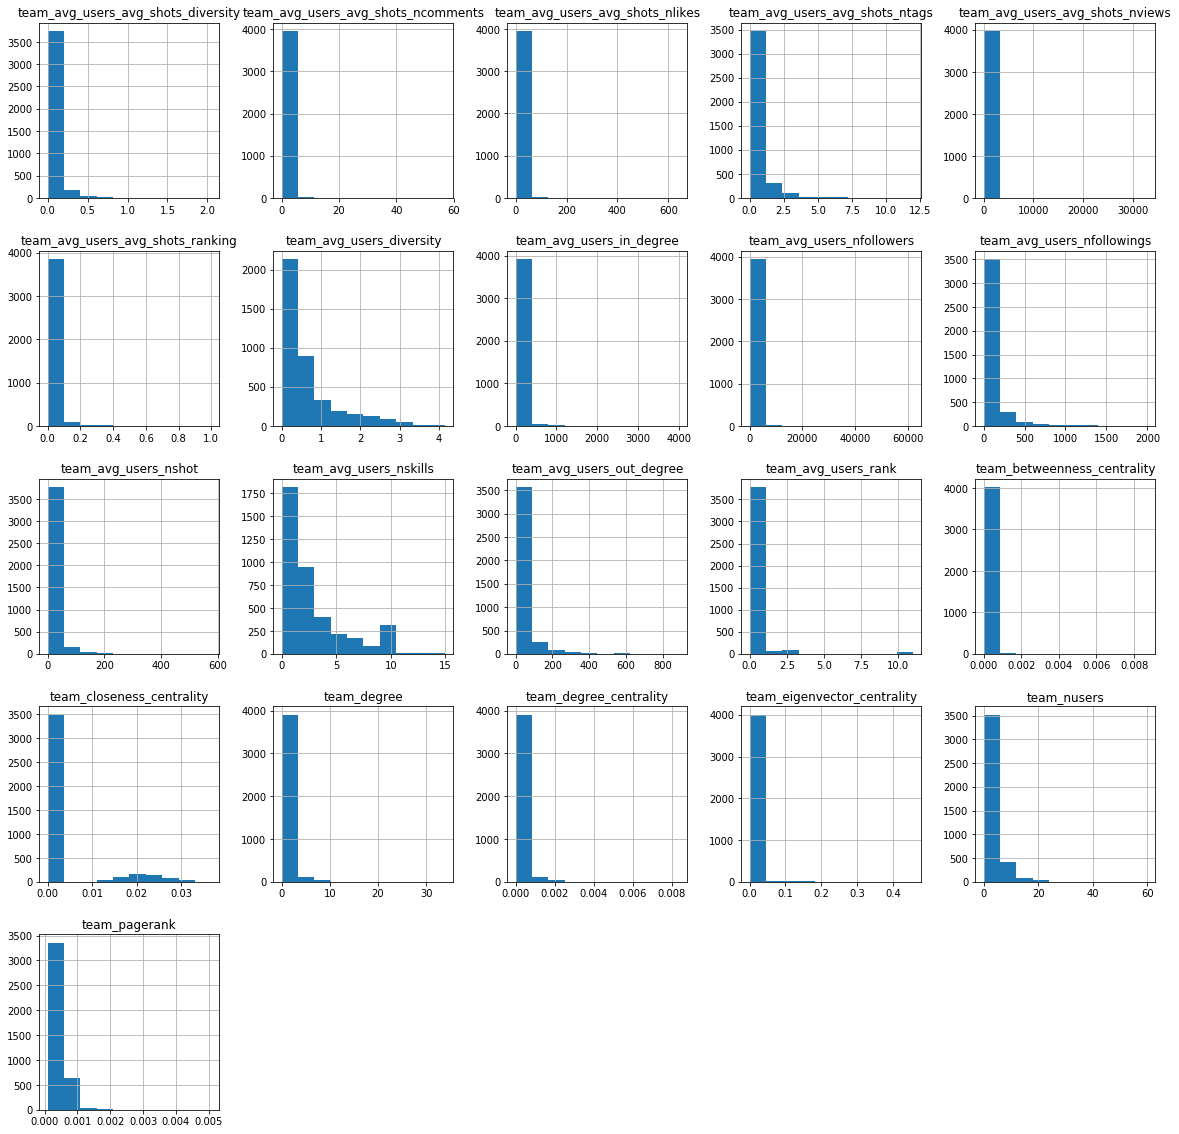

In [4]:

samples.hist()

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.savefig("tot_teams_distrib.pdf")
plt.show()

### SKEWNESS del Dataset

In [5]:
sample_skew = skew(samples, nan_policy='omit')

for sk ,f in zip(sample_skew, list(samples)):
    print round(sk, 3), '\t\t', f

4.565 		team_nusers
7.418 		team_degree
7.421 		team_degree_centrality
21.099 		team_betweenness_centrality
2.3 		team_closeness_centrality
13.956 		team_eigenvector_centrality
3.757 		team_pagerank
7.098 		team_avg_users_nshot
14.131 		team_avg_users_in_degree
4.885 		team_avg_users_out_degree
7.341 		team_avg_users_rank
1.823 		team_avg_users_diversity
1.487 		team_avg_users_nskills
18.725 		team_avg_users_nfollowers
4.979 		team_avg_users_nfollowings
8.369 		team_avg_users_avg_shots_ranking
5.154 		team_avg_users_avg_shots_ntags
21.098 		team_avg_users_avg_shots_ncomments
22.36 		team_avg_users_avg_shots_nlikes
35.698 		team_avg_users_avg_shots_nviews
7.45 		team_avg_users_avg_shots_diversity


Si può notare come alcune features risultino molto asimmetriche

### Applico Log-function al Dataset

In [6]:
samples_log = samples.apply(np.log)
samples_log = samples_log.replace(-np.inf, 0)
samples_log = samples_log.fillna(0)
samples_log

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,2.564949,1.098612,-7.210213,0.000000,-3.760719,-5.669961,-7.604910,0.704912,1.487504,2.105000,...,-2.442319,-0.925205,4.057685,3.343552,-6.516389,-2.442077,-3.929067,-0.264348,2.906031,-5.202462
1,0.000000,0.000000,-8.310179,0.000000,-8.310179,0.000000,-7.408631,4.127134,3.367296,4.955827,...,0.377496,2.197225,5.192957,5.820083,-5.516722,-2.322023,-3.721651,-0.750980,1.903008,-4.474668
2,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,3.308107,3.240855,3.023131,...,-0.669978,0.747214,5.080023,3.868884,-8.209708,-0.554563,-5.146111,0.622085,3.056393,-4.905330
3,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,0.798508,2.233592,3.404894,...,-0.202146,0.847298,3.529623,3.942660,-4.971607,0.035610,-1.053512,1.704004,4.810879,-3.998289
4,2.639057,1.098612,-7.210213,-7.635494,-3.846844,-7.777640,-7.432004,0.324004,2.425796,2.547131,...,-2.309509,-0.934310,4.506420,3.857179,-5.175392,-1.188191,-0.580045,2.090399,5.125479,-3.671708
5,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,1.734601,2.581899,4.859812,...,-0.682878,0.798508,4.073764,5.681310,-5.413279,-1.593771,-3.207293,-0.380807,2.726335,-3.654787
6,1.791759,0.000000,-8.310179,0.000000,-8.019453,0.000000,-7.658532,1.787119,1.236762,3.073208,...,-1.277157,0.027399,3.398416,3.879844,-6.280748,-2.360967,-4.882902,-1.302534,1.965480,-4.820222
7,0.693147,0.000000,-8.310179,0.000000,-8.310179,0.000000,-7.408631,3.248435,2.772589,4.147095,...,-2.121648,0.559616,4.627421,4.907125,-7.281722,-0.882409,-2.053633,-0.155575,3.602966,-3.965318
8,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,2.397895,2.876386,4.921804,...,-0.852610,0.405465,5.626721,6.018593,-5.053647,0.267389,0.456754,3.058575,6.057789,-4.113283
9,2.944439,1.386294,-6.921854,-8.477972,-3.805009,-6.143218,-6.938214,0.398981,1.044545,1.548917,...,-2.782979,-1.356277,2.853696,2.299811,-7.625195,-3.497268,-3.574980,-0.794580,2.971599,-6.001515


### Distribuzione delle features con Log-function

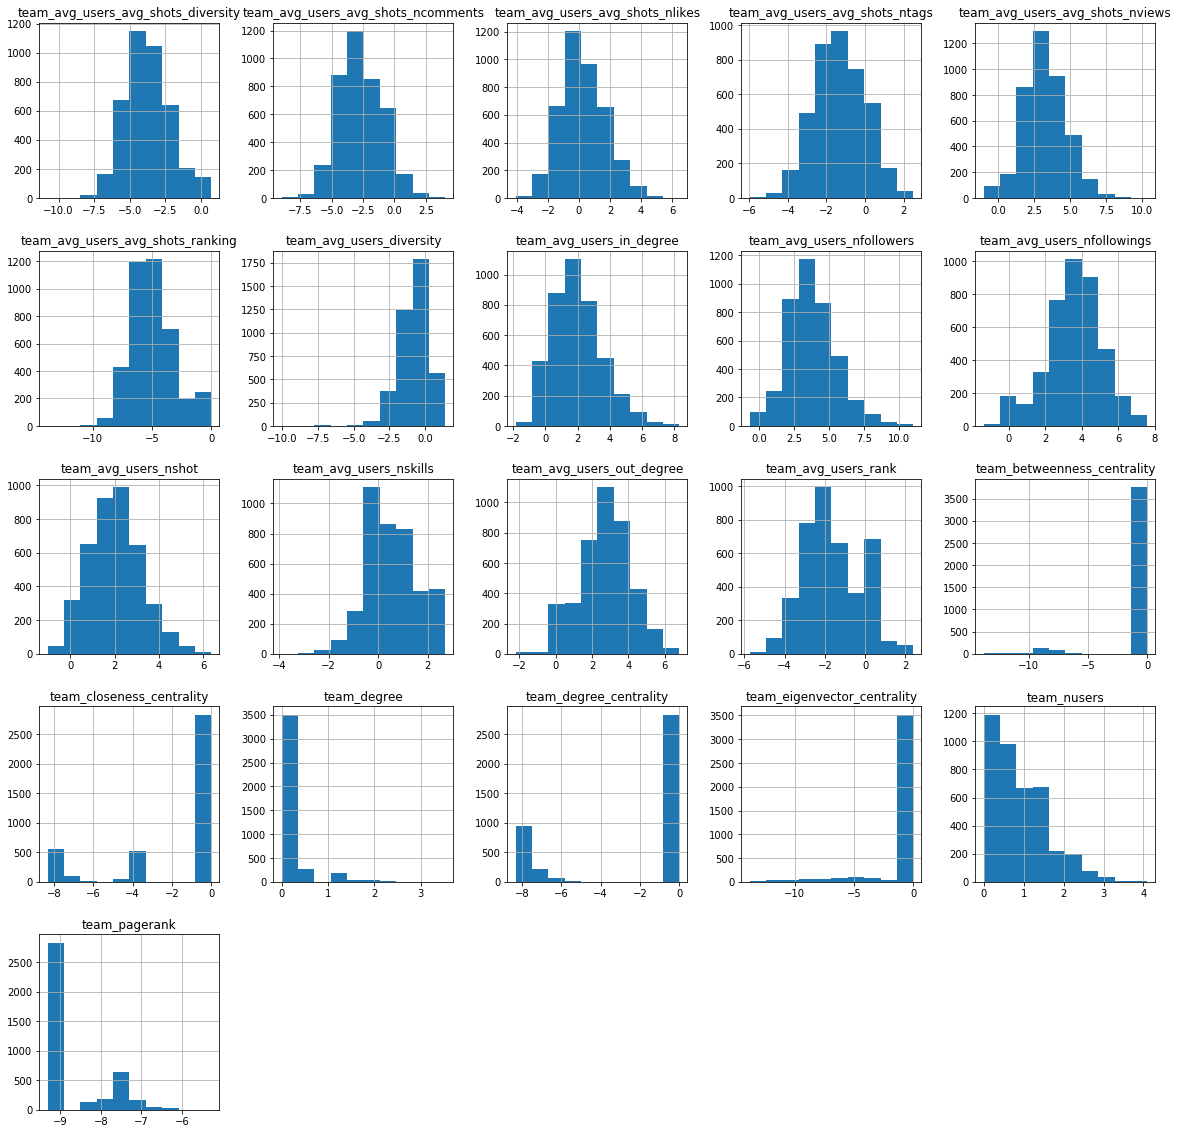

In [8]:
samples_log.hist()

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.savefig("tot_teams_distrib_log.pdf")
plt.show()

### SKEWNESS del Dataset con Log-function

In [8]:
sample_skew_log = skew(samples_log, nan_policy='omit')

for sk ,f in zip(sample_skew_log, list(samples_log)):
    print round(sk, 3), '\t\t', f

0.528 		team_nusers
3.214 		team_degree
-0.893 		team_degree_centrality
-3.621 		team_betweenness_centrality
-1.282 		team_closeness_centrality
-2.979 		team_eigenvector_centrality
1.121 		team_pagerank
0.305 		team_avg_users_nshot
0.672 		team_avg_users_in_degree
-0.155 		team_avg_users_out_degree
0.267 		team_avg_users_rank
-1.411 		team_avg_users_diversity
-0.043 		team_avg_users_nskills
0.475 		team_avg_users_nfollowers
-0.359 		team_avg_users_nfollowings
0.671 		team_avg_users_avg_shots_ranking
0.047 		team_avg_users_avg_shots_ntags
0.269 		team_avg_users_avg_shots_ncomments
0.392 		team_avg_users_avg_shots_nlikes
0.28 		team_avg_users_avg_shots_nviews
0.284 		team_avg_users_avg_shots_diversity


l'asimmetria delle features si è ridotta, posso ora andare ad applicare una normalizzazione.

# Robust Scaler Normalization

In [9]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(samples_log)
samples_scaled = pd.DataFrame(transformer.transform(samples_log), columns=list(samples))
samples_scaled

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,1.350220,1.098612,-1.000000,0.000000,-1.003958,-5.669961,1.281014,-0.809735,-0.180571,-0.378069,...,-1.310498,-1.113705,0.192632,-0.176497,-0.581155,-0.584770,-0.439814,-0.196167,-0.150076,-0.632524
1,-0.500000,0.000000,-1.152557,0.000000,-2.218477,0.000000,1.428941,1.361816,0.775514,1.236413,...,0.734313,1.378729,0.701195,1.210283,-0.144977,-0.519957,-0.355782,-0.445678,-0.665175,-0.286485
2,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842107,0.711205,0.141887,...,-0.025271,0.221279,0.650604,0.117672,-1.319990,0.434231,-0.932883,0.258334,-0.072858,-0.491249
3,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.750344,0.198898,0.358088,...,0.313982,0.301170,-0.043921,0.158985,0.092870,0.752844,0.725180,0.813066,0.828153,-0.059984
4,1.403677,1.098612,-1.000000,-7.635494,-1.026949,-7.777640,1.411326,-1.051438,0.296655,-0.127682,...,-1.214191,-1.120973,0.393650,0.111118,0.003954,0.092158,0.916999,1.011183,0.989715,0.095293
5,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.156352,0.376052,1.182038,...,-0.034625,0.262224,0.199835,1.132575,-0.099842,-0.126800,-0.147396,-0.255879,-0.242358,0.103338
6,0.792481,0.000000,-1.152557,0.000000,-2.140865,0.000000,1.240603,-0.123027,-0.308102,0.170247,...,-0.465572,-0.353303,-0.102697,0.123810,-0.478339,-0.540981,-0.826248,-0.728476,-0.633093,-0.450783
7,0.000000,0.000000,-1.152557,0.000000,-2.218477,0.000000,1.428941,0.804242,0.473039,0.778411,...,-1.077961,0.071532,0.447854,0.699055,-0.915087,0.257239,0.319994,-0.140396,0.207833,-0.044308
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264537,0.525831,1.217145,...,-0.157708,-0.051517,0.895506,1.321443,0.057074,0.877973,1.337045,1.507596,1.468500,-0.114659
9,1.623964,1.386294,-0.960007,-8.477972,-1.015781,-6.143218,1.783472,-1.003862,-0.405866,-0.692991,...,-1.557531,-1.457803,-0.346713,-0.760959,-1.064953,-1.154429,-0.296360,-0.468033,-0.116404,-1.012444


# Load target

In [11]:
target = pd.read_csv('../features collection/results/tot/teams_nlikes_target.csv')
target = target.drop(target.columns[0], axis=1)

In [12]:
target_log = target.apply(np.log)
target_log = target_log.replace(-np.inf, 0)
target_log = target_log.fillna(0)

In [13]:
transformer = RobustScaler().fit(target_log)
target_scaled = pd.DataFrame(transformer.transform(target_log), columns=['likes'])
target_scaled

,likes
0,1.176516
1,0.150820
2,0.641829
3,-0.109165
4,1.595802
5,0.123739
6,0.535721
7,0.239134
8,0.436020
9,1.054611


# Fit Lasso Regression

In [14]:
from scipy.stats import uniform as sp_rand
import random
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.model_selection import GridSearchCV

# prepare a uniform distribution to sample for the alpha parameter
param = []
for i in range(10):
    param.append(random.uniform(0, 1)) 
param_grid = {'alpha': param}
# create and fit a ridge regression model, testing random alpha values
model = Lasso()
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)
rsearch.fit(samples_scaled, target_scaled)
# print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


0.6093678322381472
0.142545539438


# Check Lasso Accuracy

In [81]:
x_train = samples_scaled[0:400]
y_train = target_scaled[0:400]
x_test = samples_scaled[400:800]
y_test = target_scaled[400:800]

In [82]:
regressor = Lasso(alpha=0.1425)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

In [83]:
print regressor.score(x_test,y_test)

0.9794542125007829


# Fit SVR

In [15]:
from scipy.stats import uniform as sp_rand
import random
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# prepare a uniform distribution to sample for the alpha parameter
param_grid={
            "C": [1e0, 1e1, 1e2, 1e3], 
            "gamma": np.logspace(-2, 2, 5),
            "epsilon":  [0, 0.01, 0.1, 0.5, 1, 2, 4]
           }

# create and fit a ridge regression model, testing random alpha values
model = SVR(kernel='rbf', gamma=0.1)
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)
rsearch.fit(samples_scaled, target_scaled)

# print(rsearch)
# summarize the results of the random parameter search
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C 
print 'gsmma: ', rsearch.best_estimator_.gamma 
print 'epsilon: ', rsearch.best_estimator_.epsilon 

/home/simo/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.9699885357386888
C:  100.0
gsmma:  0.01
epsilon:  0.1


# Check SVR Accuracy

In [16]:
regressor = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.1)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

NameError: name 'x_train' is not defined

In [79]:
print regressor.score(x_test,y_test)

0.9768563275033267
